##                                           ____________ 7 types of dry bean seeds classification Prediction ____________
 

### 1. Import Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


### 2. Data Pre Processing

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.shape

(13611, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

### 2.1 Looking for null values

In [5]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### 2.2 Checking the statistical measures of attributes

In [6]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### 2.3 Checking the distribution of target variable/attribute

In [7]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

### 3. Data Visualization

<Axes: xlabel='Class', ylabel='count'>

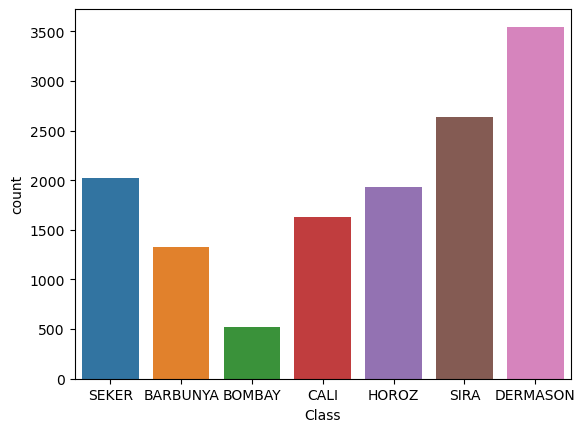

In [8]:
sns.countplot(x='Class', data=df)

### 3.2 Data corraltion

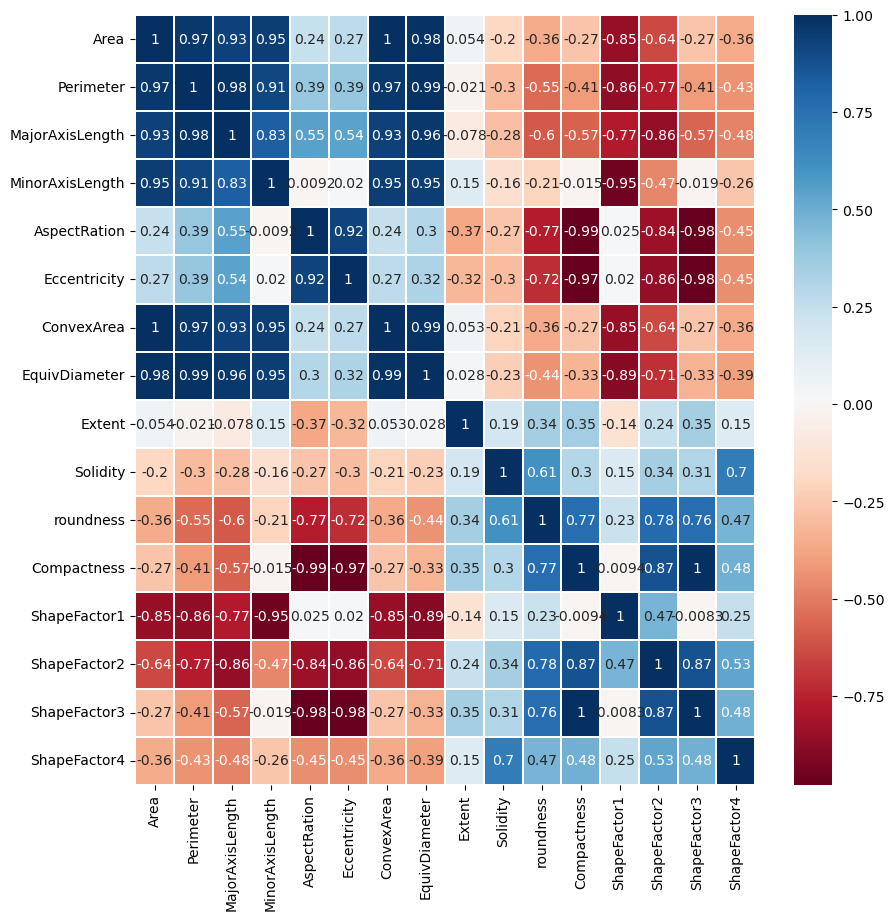

In [9]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, linewidth=0.2,robust=True , cmap='RdBu')
plt.show()

In [13]:
co_relation = df.corr()
co_relation
# co_relation["Class"].sort_values(ascending = False)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


### 4. One Hot Encoding

In [14]:
class_ = {'DERMASON':0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6}
df['Class'] = df['Class'].replace(class_)

In [15]:
class_

{'DERMASON': 0,
 'SIRA': 1,
 'SEKER': 2,
 'HOROZ': 3,
 'CALI': 4,
 'BARBUNYA': 5,
 'BOMBAY': 6}

In [16]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,2
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,2
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,2
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,2


#### 5. Features and Label

In [17]:
x = df.drop(columns=['Class'], axis=1)

y = df['Class']

In [18]:
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [19]:
y

0        2
1        2
2        2
3        2
4        2
        ..
13606    0
13607    0
13608    0
13609    0
13610    0
Name: Class, Length: 13611, dtype: int64

#### 6. Train Test Split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(13611, 16) (10888, 16) (2723, 16)


In [22]:
print(y.shape,y_train.shape,y_test.shape)

(13611,) (10888,) (2723,)


#### 5. Standardization

In [23]:
Standardized_data = StandardScaler()

In [24]:
Standardized_data.fit(x_train)
x_train = Standardized_data.transform(x_train)

In [25]:
x_train[:-1]

array([[-0.40865341, -0.45097869, -0.37477393, ...,  0.00468897,
        -0.1323717 , -0.16695899],
       [-0.85523907, -1.04683579, -0.90842577, ...,  0.42253339,
        -0.36373034,  0.5793931 ],
       [-0.33488367, -0.33150817, -0.25105528, ..., -0.15517109,
        -0.26472598, -0.08222261],
       ...,
       [-0.72890369, -0.87150893, -0.90839711, ...,  0.85661596,
         0.44305347, -0.10175182],
       [ 0.07462902,  0.34492751,  0.67436922, ..., -1.15992078,
        -1.52432151, -0.13278127],
       [ 0.5027808 ,  0.7696124 ,  0.6135594 , ..., -0.6819623 ,
        -0.22731582,  0.4538221 ]])

In [26]:
x_test = Standardized_data.transform(x_test)

In [27]:
x_test[:-1]

array([[-2.10908095e-01, -9.68619783e-02,  1.21499112e-01, ...,
        -7.00439397e-01, -9.81858853e-01, -1.02324219e-01],
       [-5.24591943e-01, -6.97546695e-01, -9.58039827e-01, ...,
         1.80023217e+00,  2.04449421e+00,  6.93895713e-01],
       [-2.81155219e-01, -2.26389630e-01, -2.28006529e-01, ...,
        -1.11523712e-01, -1.23015466e-01, -3.62870608e-04],
       ...,
       [ 2.89638144e+00,  2.49628478e+00,  2.09278065e+00, ...,
        -1.02058919e+00,  6.04299850e-01, -2.24348818e-01],
       [-5.63203921e-01, -7.28680813e-01, -7.23802614e-01, ...,
         6.84182688e-01,  5.53506493e-01,  8.14563321e-01],
       [ 9.31342976e-01,  1.15970018e+00,  1.29286881e+00, ...,
        -1.19266368e+00, -9.36773409e-01, -8.45921578e-01]])

### 6. Fitting the Model

In [28]:
model = svm.SVC(kernel = "linear")
# model = DecisionTreeClassifier(max_depth=8)

In [29]:
model.fit(x_train, y_train)


SVC(kernel='linear')

In [30]:
#prediction
training_data_prediction = model.predict(x_train)

#checking accuracy score
training_data_accuracy = accuracy_score(training_data_prediction, y_train)

print("This is the accuracy score for training data : ",training_data_accuracy)

This is the accuracy score for training data :  0.9285451873622337


In [31]:
#prediction
test_data_prediction = model.predict(x_test)

#checking accuracy score
test_data_accuracy = accuracy_score(y_test, test_data_prediction)

print("This is the accuracy score for test data : ",test_data_accuracy)

This is the accuracy score for test data :  0.9250826294528094


In [32]:
#get the values from user
input_values = (66377,1060.47,369.2427646,230.3727641,1.602805636,0.781499421,67927,290.7016599,0.744239244,0.977107777,0.741648281,0.787291418,0.005563231,0.001318415,0.619827078,0.993463455)

#coverting the values into array(numpy array)

input_array = np.asarray(input_values)

#re-shapeing becouse we only want to predict for one instance as 0 or 1

re_shape_data = input_array.reshape(1,-1)

#standardizing the data
standard_data = Standardized_data.transform(re_shape_data)

prediction = model.predict(standard_data)
print(prediction)
# class_ = {'DERMASON':0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6}
if prediction == 0:
    print("DERMASON")
elif prediction == 1:
    print("SIRA")
    
elif prediction == 2:
    print("SEKER")
elif prediction == 3:
    print("HOROZ")
elif prediction == 4:
    print("CALI")
    
elif prediction == 5:
    print("BARBUNYA")
    
elif prediction == 6:
    print("BOMBAY")
    

else:
    print("not from the class")

[5]
BARBUNYA


C:\Users\Madina Computers\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
